# Introduction

The database represents a fictitious company: Classic Models Inc. which buys
collectable model cars, trains, trucks, buses, trains and ships directly from manufacturers and sells them to
distributors across the globe.

- __Customers__: stores customer’s data.
- __Products__: stores a list of scale model cars.
- __ProductLines__: stores a list of product line categories.
- __Orders__: stores sales orders placed by customers.
- __OrderDetails__: stores sales order line items for each sales order.
- __Payments__: stores payments made by customers based on their accounts.
- __Employees__: stores all employee information as well as the organization structure such as who reports to whom.
- __Offices__: stores sales office data.

## Database ER-diagram


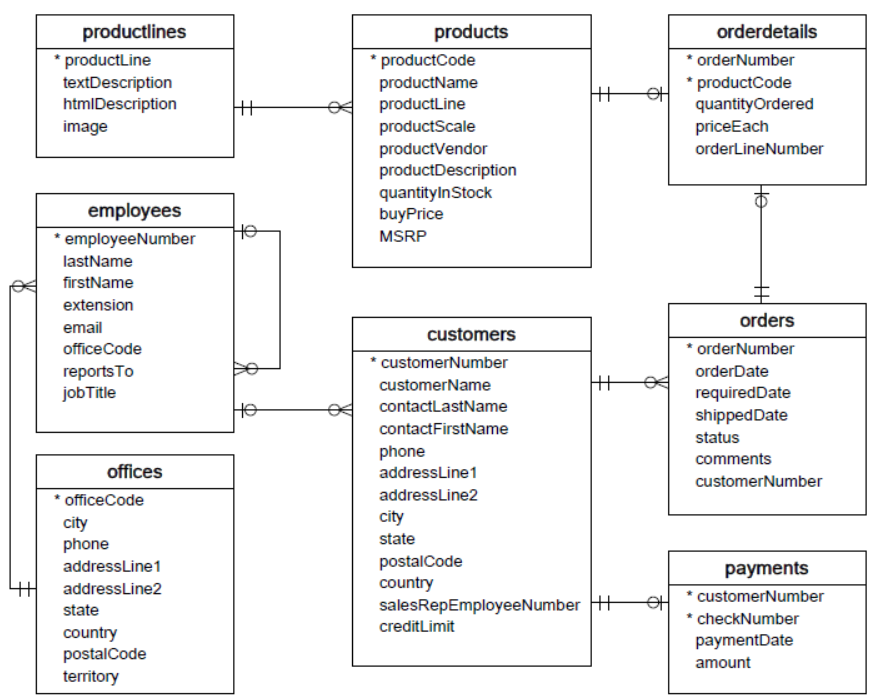

# Establishing a connection

## Prerequisites:

Need to install Python and MySQL databases. Then install MySQL Connector/Python client or API on your Python environment.

To work with MySQL using Python, you must have an authorized user account on the MySQL server.

Note: Need to install mysql-connector-python package to run your code.

In [76]:
# uncomment to install
# !pip install mysql-connector-python

In [7]:
# Importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import mysql.connector
import datetime as dt
from dotenv import load_dotenv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats

In [9]:
%reload_ext dotenv
%dotenv
import os
# load the database host, user, password from an .env file
db_host = os.getenv("DB_HOST")
db_user = os.getenv("DB_USER")
db_pass = os.getenv("DB_PASSWORD")

Establishing a connection to their MySQL database using Python, via MySQL Connector/Python API. To achieve this task please fill in the following steps:

- 1: import the appropriate MySQL connector library using the alias connector

- 2: Next, create a variable called connection and use it to store an instance of the connection made with the database using the connector module. This module uses a method called connect() and you should provide the relevant connection details.

__TIP__: You need to have an authenticated username and password to establish the connection. If you don’t see any error in the output while establishing the connection, your connection is successfully established.

In [121]:
try:
    print("Establishing a new connection between MySQL and Python.")
    mydb=mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_pass,
    database='classicmodels')
    print("A connection between MySQL and Python is successfully established")

except mysql.connector.Error as er:
    print("Error code:", er.errno)
    print("Error message:", er.msg)
    
cursor=mydb.cursor()

Establishing a new connection between MySQL and Python.
A connection between MySQL and Python is successfully established


In [122]:
def run_query(query, mydb = mydb):
    try:
        result = pd.read_sql(query,mydb)
        print(result)

    except mysql.connector.Error as er:
        print("Error code:", er.errno)
        print("Error message:", er.msg)


## Let's answer few questions


### Single Entity

1. Prepare a list of offices sorted by country, state, city.

In [80]:
q1 = """
SELECT `officeCode` AS `Office Code`,`country`, `state`, `city` 
FROM offices 
ORDER BY `country`, `state`, `city`
"""
run_query(q1)

  Office Code    country       state           city
0           6  Australia         NSW         Sydney
1           4     France        None          Paris
2           5      Japan  Chiyoda-Ku          Tokyo
3           7         UK        None         London
4           1        USA          CA  San Francisco
5           2        USA          MA         Boston
6           3        USA          NY            NYC


2. How many employees are there in the company?

In [81]:
q2 = """
SELECT count(*) AS 'Total Employees'
FROM employees
"""
run_query(q2)

   Total Employees
0               23


3. What is the total of payments received?

In [82]:
q3 = """
SELECT SUM(payments.amount) AS 'Total Payments ($)'
FROM payments
"""
run_query(q3)


   Total Payments ($)
0          8853839.23


4. List the product lines that contain 'Cars'.

In [83]:
q4 = """
SELECT productLine AS `Product Lines: Cars`
FROM productlines
WHERE productLine LIKE '%Car%'
"""
run_query(q4)

  Product Lines: Cars
0        Classic Cars
1        Vintage Cars


5. Report total payments for October 28, 2004.

In [84]:
q5 = """
SELECT SUM(amount) AS 'Total payments($) on October 28, 2004'
from payments
WHERE paymentDate = '2004-10-28'
"""
run_query(q5)

   Total payments($) on October 28, 2004
0                               47411.33


6. Report those payments greater than $100,000.

In [85]:
q6 = """
SELECT *
FROM payments
WHERE payments.amount > 100000
"""
run_query(q6)

  checkNumber paymentDate     amount  customerNumber
0    AE215433  2005-03-05  101244.59             124
1     ID10962  2004-12-31  116208.40             141
2    JE105477  2005-03-18  120166.58             141
3    KI131716  2003-08-15  111654.40             124
4    KM172879  2003-12-26  105743.00             148


7. List the products in each product line.

In [86]:
q7 = """
SELECT productLine AS `Product Line`,GROUP_CONCAT(DISTINCT productName ORDER BY productName  SEPARATOR " | ") AS `Product Names`
FROM products
GROUP BY productLine
"""
run_query(q7)

       Product Line                                      Product Names
0      Classic Cars  1948 Porsche 356-A Roadster | 1948 Porsche Typ...
1       Motorcycles  1936 Harley Davidson El Knucklehead | 1957 Ves...
2            Planes  1900s Vintage Bi-Plane | 1900s Vintage Tri-Pla...
3             Ships  18th century schooner | 1999 Yamaha Speed Boat...
4            Trains  1950's Chicago Surface Lines Streetcar | 1962 ...
5  Trucks and Buses  1926 Ford Fire Engine | 1940 Ford Pickup Truck...
6      Vintage Cars  18th Century Vintage Horse Carriage | 1903 For...


8. How many products in each product line?

In [87]:
q8 = """
SELECT productLine AS `Product Line`, count(*) AS 'Count Of Products'
FROM products
GROUP BY productLine
ORDER BY count(*) DESC
"""
run_query(q8)

       Product Line  Count Of Products
0      Classic Cars                 38
1      Vintage Cars                 24
2       Motorcycles                 13
3            Planes                 12
4  Trucks and Buses                 11
5             Ships                  9
6            Trains                  3


9. What is the minimum payment received?

In [88]:
q9 = """
SELECT MIN(amount) AS 'Minimum Payment($)'
FROM payments
"""
run_query(q9)

   Minimum Payment($)
0              615.45


10. List all payments greater than twice the average payment.

In [89]:
q10 = """
SELECT *
FROM payments
WHERE amount > (2 * (SELECT AVG(amount) FROM payments));
"""
run_query(q10)

   checkNumber paymentDate     amount  customerNumber
0     AE215433  2005-03-05  101244.59             124
1     AL493079  2005-05-23   75020.13             323
2     BG255406  2004-08-28   85410.87             124
3      DJ15149  2003-11-03   85559.12             321
4      ET64396  2005-04-16   83598.04             124
5     GN228846  2003-12-03   85024.46             167
6      ID10962  2004-12-31  116208.40             141
7     IN446258  2005-03-25   65071.26             141
8     JE105477  2005-03-18  120166.58             141
9     KI131716  2003-08-15  111654.40             124
10    KM172879  2003-12-26  105743.00             148
11    MA765515  2004-12-15   82261.22             114
12    NQ865547  2004-03-15   80375.24             239


11. What is the average percentage markup of the MSRP on buyPrice?

In [123]:
q11 = """
SELECT AVG((MSRP-buyPrice)/buyPrice)*100 AS 'Average Percentage Markup'
from products;
"""
run_query(q11)

   Average Percentage Markup
0                  88.702392


12. How many distinct products does ClassicModels sell?

In [91]:
q12 = """
SELECT COUNT(DISTINCT productName) AS 'Total Distinct Products'
FROM products
"""
run_query(q12)

   Total Distinct Products
0                      110


13. Report the name and city of customers who don't have sales representatives?

In [92]:
q13 = """
SELECT customerName, city
FROM customers
WHERE salesRepEmployeeNumber IS NULL ;
"""
run_query(q13)

                      customerName              city
0               Havel & Zbyszek Co          Warszawa
1                Porto Imports Co.            Lisboa
2       Asian Shopping Network, Co         Singapore
3                              Nat         Cunewalde
4                    ANG Resellers            Madrid
5         Messner Shopping Network         Frankfurt
6                Franken Gifts, Co           Manheim
7                BG&E Collectables          Fribourg
8                 Schuyler Imports         Amsterdam
9                 Der Hund Imports            Berlin
10                Cramer Spezialit       Brandenburg
11           Asian Treasures, Inc.              Cork
12            SAR Distributors, Co          Hatfield
13                 Kommission Auto            Passau
14          Lisboa Souveniers, Inc            Lisboa
15  Stuttgart Collectable Exchange         Stuttgart
16        Feuer Online Stores, Inc           Leipzig
17                Warburg Exchange            

14. What are the names of executives with VP or Manager in their title? Use the CONCAT function to combine the employee's first name and last name into a single field for reporting.

In [93]:
q14 = """
SELECT concat(firstName, ' ',lastName) AS 'Full Name'
FROM employees
WHERE jobTitle LIKE '%VP%' OR jobTitle LIKE '%Manager%';
"""
run_query(q14)

           Full Name
0     Mary Patterson
1      Jeff Firrelli
2  William Patterson
3      Gerard Bondur
4        Anthony Bow


15. Which orders have a value greater than $5,000?

In [94]:
q15 = """
SELECT orderNumber, SUM(priceEach * quantityOrdered) AS `Order Value($)`
FROM orderdetails
GROUP BY orderNumber
HAVING SUM(priceEach * quantityOrdered) > 5000
ORDER BY SUM(priceEach * quantityOrdered);
"""
run_query(q15)

     orderNumber  Order Value($)
0          10102         5494.78
1          10216         5759.42
2          10422         5849.44
3          10290         5858.56
4          10236         5899.38
..           ...             ...
298        10207        59265.14
299        10212        59830.55
300        10310        61234.67
301        10287        61402.00
302        10165        67392.85

[303 rows x 2 columns]


### One to many relationship

1. Report the account representative for each customer.

In [95]:
r1 = """
SELECT customerName, CONCAT(e.firstName,' ',e.lastName) AS 'Account Representative'
FROM customers
INNER JOIN employees e ON customers.salesRepEmployeeNumber = e.employeeNumber;
"""
run_query(r1)

                      customerName Account Representative
0                Atelier graphique       Gerard Hernandez
1               Signal Gift Stores        Leslie Thompson
2       Australian Collectors, Co.            Andy Fixter
3                La Rochelle Gifts       Gerard Hernandez
4               Baane Mini Imports            Barry Jones
..                             ...                    ...
95    Motor Mint Distributors Inc.          George Vanauf
96        Signal Collectibles Ltd.        Leslie Jennings
97  Double Decker Gift Stores, Ltd             Larry Bott
98            Diecast Collectables         Julie Firrelli
99               Kelly's Gift Shop            Peter Marsh

[100 rows x 2 columns]


2. Report total payments for Atelier graphique.

In [96]:
r2 = """
SELECT c.customerName, SUM(payments.amount) AS 'Total Payments($)'
FROM payments
INNER JOIN customers c ON payments.customerNumber = c.customerNumber
WHERE c.customerName = 'Atelier graphique'
"""
run_query(r2)

        customerName  Total Payments($)
0  Atelier graphique           22314.36


3. Report the total payments by date

In [97]:
r3 = """
SELECT paymentDate,SUM(amount) AS 'Amount($)'
FROM payments
GROUP BY paymentDate
"""
run_query(r3)

    paymentDate  Amount($)
0    2004-07-28    9415.13
1    2003-10-24   57251.38
2    2004-09-09    1960.80
3    2005-03-10   23602.90
4    2005-03-05  101244.59
..          ...        ...
227  2004-05-04   36069.26
228  2004-07-10   42044.77
229  2004-01-31    7310.42
230  2004-12-24   39440.59
231  2004-02-29   12573.28

[232 rows x 2 columns]


4. Report the products that have not been sold.

In [98]:
r4 = """
SELECT productCode, productName, productLine  FROM products
WHERE NOT EXISTS ( SELECT * FROM orderdetails
                   WHERE products.productCode = orderdetails.productCode )
"""
run_query(r4)

  productCode        productName   productLine
0    S18_3233  1985 Toyota Supra  Classic Cars


5. List the amount paid by each customer.

In [99]:
r5 = """
SELECT c.customerName AS `Customer Name`, SUM(p.amount) AS `Amount Paid($)`
FROM customers c
JOIN payments p
ON c.customerNumber = p.customerNumber
GROUP BY c.customerName
ORDER BY SUM(p.amount) DESC;
"""
run_query(r5)

                   Customer Name  Amount Paid($)
0         Euro+ Shopping Channel       715738.98
1   Mini Gifts Distributors Ltd.       584188.24
2     Australian Collectors, Co.       180585.07
3             Muscle Machine Inc       177913.95
4        Dragon Souveniers, Ltd.       156251.03
..                           ...             ...
93                  Royale Belge        29217.18
94            Frau da Collezione        25358.32
95             Atelier graphique        22314.36
96       Auto-Moto Classics Inc.        21554.26
97             Boards & Toys Co.         7918.60

[98 rows x 2 columns]


6. How many orders have been placed by Herkku Gifts?

In [100]:
r6 = """
SELECT COUNT(o.orderNumber) AS 'Total Orders by Herkku Gifts'
FROM orders o
JOIN customers c
ON o.customerNumber = c.customerNumber
WHERE c.customerName = 'Herkku Gifts';
"""
run_query(r6)

   Total Orders by Herkku Gifts
0                             3


7. Who are the employees in Boston?

In [101]:
r7 = """
SELECT CONCAT(employees.firstName, " ", employees.lastName) AS 'Employee Name', offices.city
FROM employees
JOIN offices ON employees.officeCode = offices.officeCode
WHERE offices.city = 'Boston';
"""
run_query(r7)

     Employee Name    city
0   Julie Firrelli  Boston
1  Steve Patterson  Boston


8. Report those payments greater than $100,000. Sort the report so the customer who made the highest payment appears first.

In [102]:
r8 = """
SELECT customers.customerName, SUM(amount) AS 'Total Payments($)'
FROM payments
JOIN customers ON customers.customerNumber = payments.customerNumber
WHERE amount > 100000
GROUP BY customers.customerName
ORDER BY customers.customerName DESC;
"""
run_query(r8)

                   customerName  Total Payments($)
0  Mini Gifts Distributors Ltd.          212898.99
1        Euro+ Shopping Channel          236374.98
2       Dragon Souveniers, Ltd.          105743.00


9. List the value of 'On Hold' orders.

In [103]:
r9 = """
SELECT o.orderNumber, p.amount AS 'Amount on hold($)'
FROM payments p
JOIN orders o
ON p.customerNumber = o.customerNumber
WHERE o.status = 'On Hold';
"""
run_query(r9)

   orderNumber  Amount on hold($)
0        10334           36005.71
1        10334            7674.94
2        10401            7178.66
3        10401           31102.85
4        10407           59551.38
5        10414           18473.71
6        10414           15059.76


10. Report the number of orders 'On Hold' for each customer.

In [104]:
r10 = """
SELECT customerName , count(*) As 'Orders on Hold'
FROM customers
INNER JOIN orders
ON customers.customerNumber = orders.customerNumber
WHERE orders.status = 'On Hold'
GROUP BY customerName;
"""
run_query(r10)

                customerName  Orders on Hold
0   Volvo Model Replicas, Co               1
1    Tekni Collectables Inc.               1
2  The Sharp Gifts Warehouse               1
3          Gifts4AllAges.com               1


### Many to many relationship

1. List products sold by order date.

In [105]:
s1 = """
SELECT DISTINCT(p.productName) AS 'Product Name', o.orderDate
FROM (orders o 
JOIN orderdetails od 
ON o.orderNumber = od.orderNumber)
JOIN products p
ON p.productCode = od.productCode
GROUP BY o.orderDate;
"""
run_query(s1)

                              Product Name  orderDate
0    1969 Harley Davidson Ultimate Chopper 2003-02-24
1    1969 Harley Davidson Ultimate Chopper 2003-05-07
2    1969 Harley Davidson Ultimate Chopper 2003-07-01
3    1969 Harley Davidson Ultimate Chopper 2003-08-25
4    1969 Harley Davidson Ultimate Chopper 2003-10-10
..                                     ...        ...
260               1928 Ford Phaeton Deluxe 2003-08-13
261           1930 Buick Marquette Phaeton 2003-10-08
262                          The Mayflower 2005-03-28
263                     F/A 18 Hornet 1/72 2003-06-25
264                            The Titanic 2003-04-21

[265 rows x 2 columns]


2. List the order dates in descending order for orders for the 1940 Ford Pickup Truck.

In [106]:
s2 = """
SELECT DISTINCT(products.productName), orders.orderDate
FROM (orders
JOIN orderdetails ON orderdetails.orderNumber = orders.orderNumber)
JOIN products ON orderdetails.productCode = products.productCode
WHERE productName = '1940 Ford Pickup Truck'
ORDER BY orderDate DESC;
"""
run_query(s2)

               productName  orderDate
0   1940 Ford Pickup Truck 2005-05-31
1   1940 Ford Pickup Truck 2005-05-01
2   1940 Ford Pickup Truck 2005-03-09
3   1940 Ford Pickup Truck 2005-02-17
4   1940 Ford Pickup Truck 2005-01-20
5   1940 Ford Pickup Truck 2004-12-10
6   1940 Ford Pickup Truck 2004-11-29
7   1940 Ford Pickup Truck 2004-11-18
8   1940 Ford Pickup Truck 2004-11-04
9   1940 Ford Pickup Truck 2004-10-21
10  1940 Ford Pickup Truck 2004-10-11
11  1940 Ford Pickup Truck 2004-09-08
12  1940 Ford Pickup Truck 2004-08-17
13  1940 Ford Pickup Truck 2004-07-19
14  1940 Ford Pickup Truck 2004-06-15
15  1940 Ford Pickup Truck 2004-05-04
16  1940 Ford Pickup Truck 2004-03-10
17  1940 Ford Pickup Truck 2004-01-29
18  1940 Ford Pickup Truck 2003-12-05
19  1940 Ford Pickup Truck 2003-11-25
20  1940 Ford Pickup Truck 2003-11-13
21  1940 Ford Pickup Truck 2003-11-06
22  1940 Ford Pickup Truck 2003-10-21
23  1940 Ford Pickup Truck 2003-09-19
24  1940 Ford Pickup Truck 2003-07-24
25  1940 For

3. List the names of customers and their corresponding order number where a particular order from that customer has a value greater than $25,000?

In [107]:
s3 = """
SELECT customers.customerName, orders.orderNumber, SUM(orderdetails.priceEach * orderdetails.quantityOrdered) AS Total_Value
FROM customers
JOIN orders ON customers.customerNumber = orders.customerNumber
JOIN orderdetails ON orders.orderNumber = orderdetails.orderNumber
GROUP BY customers.customerName, orders.orderNumber
HAVING Total_Value > 25000;
"""
run_query(s3)

                   customerName  orderNumber  Total_Value
0            Signal Gift Stores        10124     32641.98
1            Signal Gift Stores        10278     33347.88
2    Australian Collectors, Co.        10120     45864.03
3    Australian Collectors, Co.        10223     44894.74
4    Australian Collectors, Co.        10342     40265.60
..                          ...          ...          ...
187    Signal Collectibles Ltd.        10149     29997.09
188        Diecast Collectables        10207     59265.14
189           Kelly's Gift Shop        10138     32077.44
190           Kelly's Gift Shop        10360     52166.00
191           Kelly's Gift Shop        10399     30253.75

[192 rows x 3 columns]


4. Are there any products that appear on all orders?

In [108]:
s4 = """
SELECT IF((
SELECT COUNT(productCode) AS ValueFrequency
FROM orderdetails 
GROUP BY productCode 
ORDER BY ValueFrequency DESC limit 1) = (
SELECT count(*) 
FROM orders), "YES", "NO") AS `Are there any products that appear on all orders`;
"""
run_query(s4)

  Are there any products that appear on all orders
0                                               NO


5. List the names of products sold at less than 80% of the MSRP.

In [109]:
s5 = """
SELECT distinct products.productName, products.MSRP AS 'MSRP($)', orderdetails.priceEach AS 'priceEach($)'
FROM products
JOIN orderdetails ON products.productCode = orderdetails.productCode
WHERE orderdetails.priceEach < (0.8*products.MSRP)
ORDER BY products.MSRP DESC;
"""
run_query(s5)

                                    productName  MSRP($)  priceEach($)
0                      1952 Alpine Renault 1300   214.30        171.44
1                   1992 Ferrari 360 Spider red   169.34        135.47
2                   1980s Black Hawk Helicopter   157.69        126.15
3                     1957 Corvette Convertible   148.80        119.04
4                         1976 Ford Gran Torino   146.99        117.59
5                              1995 Honda Civic   142.25        113.80
6                               1993 Mazda RX-7   141.54        113.23
7                       1956 Porsche 356A Coupe   140.43        112.34
8                           1972 Alfa Romeo GTA   136.00        108.80
9                  1999 Indy 500 Monte Carlo SS   132.00        105.60
10                     1962 Volkswagen Microbus   127.79        102.23
11                        1965 Aston Martin DB5   124.44         99.55
12                        18th century schooner   122.89         98.31
13    

6. Reports those products that have been sold with a markup of 100% or more (i.e.,  the priceEach is at least twice the buyPrice)

In [110]:
s6 = """
SELECT distinct products.productName, 2*(products.buyPrice) AS '2*BuyPrice($)', orderdetails.priceEach as 'priceEach($)'
FROM products
JOIN orderdetails ON products.productCode = orderdetails.productCode
WHERE orderdetails.priceEach > 2*products.buyPrice
GROUP BY products.productName;
"""
run_query(s6)

                                  productName  2*BuyPrice($)  priceEach($)
0                    1952 Alpine Renault 1300         197.16        214.30
1        2003 Harley-Davidson Eagle Drag Bike         182.04        187.85
2                           1968 Ford Mustang         190.68        192.62
3                           2001 Ferrari Enzo         191.18        205.72
4                            2002 Suzuki XREO         132.54        146.10
5                            1969 Ford Falcon         166.10        173.02
6                     1970 Plymouth Hemi Cuda          63.84         75.81
7                           1957 Chevy Pickup         111.40        114.95
8                      1940 Ford Pickup Truck         116.66        116.67
9    1936 Mercedes-Benz 500K Special Roadster          48.52         51.21
10                1980s Black Hawk Helicopter         154.54        157.69
11                  1932 Model A Ford J-Coupe         116.96        125.86
12                      1

7. List the products ordered on a Monday.

In [111]:
s7 = """
SELECT orderdetails.productCode, products.productName, orders.orderDate , DAYNAME(orders.orderDate) As 'DayName'
FROM products
INNER JOIN orderdetails
ON products.productCode = orderdetails.productCode
INNER JOIN Orders
ON orderdetails.orderNumber = orders.orderNumber
WHERE DAYNAME(Orders.orderDate) = 'MONDAY'
GROUP BY productName;
"""
run_query(s7)

   productCode                            productName  orderDate DayName
0     S10_1678  1969 Harley Davidson Ultimate Chopper 2003-02-24  Monday
1     S10_1949               1952 Alpine Renault 1300 2003-03-24  Monday
2     S10_2016                  1996 Moto Guzzi 1100i 2003-02-24  Monday
3     S10_4698   2003 Harley-Davidson Eagle Drag Bike 2003-02-24  Monday
4     S10_4757                    1972 Alfa Romeo GTA 2003-04-28  Monday
..         ...                                    ...        ...     ...
94   S700_3505                            The Titanic 2003-04-21  Monday
95   S700_3962                         The Queen Mary 2005-01-31  Monday
96   S700_4002              American Airlines: MD-11S 2003-02-17  Monday
97    S72_1253                       Boeing X-32A JSF 2003-02-17  Monday
98    S72_3212                             Pont Yacht 2005-01-31  Monday

[99 rows x 4 columns]


8. What is the quantity on hand for products listed on 'On Hold' orders?

In [112]:
s8 = """
SELECT DISTINCT products.productName, products.quantityInStock, orders.status
FROM orderDetails
JOIN orders ON orderDetails.orderNumber = orders.orderNumber
JOIN products ON orderDetails.productCode = products.productCode
WHERE orders.status = 'On Hold'
ORDER BY products.quantityInStock DESC;
"""
run_query(s8)

                            productName  quantityInStock   status
0        America West Airlines B757-200             9653  On Hold
1                   2002 Chevy Corvette             9446  On Hold
2      1912 Ford Model T Delivery Wagon             9173  On Hold
3                 1965 Aston Martin DB5             9042  On Hold
4             American Airlines: MD-11S             8820  On Hold
5           1992 Ferrari 360 Spider red             8347  On Hold
6                   1904 Buick Runabout             8290  On Hold
7                1964 Mercedes Tour Bus             8258  On Hold
8             1966 Shelby Cobra 427 S/C             8197  On Hold
9          1999 Indy 500 Monte Carlo SS             8164  On Hold
10                        ATA: B757-300             7106  On Hold
11            The USS Constitution Ship             7083  On Hold
12         1930 Buick Marquette Phaeton             7062  On Hold
13             Corsair F4U ( Bird Cage)             6812  On Hold
14        

### Regular expressions

1. Find products containing the name 'Ford'.

In [113]:
t1 = """
SELECT productName AS 'Product Names'
FROM Products
WHERE productName LIKE '%Ford%';
"""
run_query(t1)

                       Product Names
0                  1968 Ford Mustang
1                   1969 Ford Falcon
2             1940 Ford Pickup Truck
3                 1911 Ford Town Car
4          1932 Model A Ford J-Coupe
5              1926 Ford Fire Engine
6        1913 Ford Model T Speedster
7                 1934 Ford V8 Coupe
8                  1903 Ford Model A
9              1976 Ford Gran Torino
10                  1940s Ford truck
11             1957 Ford Thunderbird
12  1912 Ford Model T Delivery Wagon
13          1940 Ford Delivery Sedan
14          1928 Ford Phaeton Deluxe


2. List products ending in 'ship'.

In [114]:
t2 = """
SELECT productName AS 'Product Names'
FROM products
WHERE productName LIKE '%ship';
"""
run_query(t2)

               Product Names
0  The USS Constitution Ship


3. Report the number of customers in Denmark, Norway, and Sweden.

In [115]:
t3 = """
SELECT CustomerName, Country
FROM Customers
WHERE country IN ('Denmark','Norway','Sweden');
"""
run_query(t3)

                CustomerName   Country
0         Baane Mini Imports    Norway
1   Volvo Model Replicas, Co    Sweden
2   Danish Wholesale Imports   Denmark
3               Herkku Gifts  Norway  
4       Heintze Collectables   Denmark
5  Norway Gifts By Mail, Co.  Norway  
6    Scandinavian Gift Ideas    Sweden


4. What are the products with a product code in the range S700_1000 to S700_1499?

In [116]:
t4 = """
SELECT productCode,productName
FROM Products
WHERE RIGHT(productCode,4) BETWEEN 1000 AND 1499
ORDER BY RIGHT(productCode,4)
"""
run_query(t4)

   productCode                               productName
0     S24_1046                1970 Chevy Chevelle SS 454
1     S18_1097                    1940 Ford Pickup Truck
2     S12_1099                         1968 Ford Mustang
3     S12_1108                         2001 Ferrari Enzo
4     S18_1129                           1993 Mazda RX-7
5    S700_1138                     The Schooner Bluenose
6     S72_1253                          Boeing X-32A JSF
7     S32_1268                1980s GM Manhattan Express
8     S50_1341              1930 Buick Marquette Phaeton
9     S18_1342                      1937 Lincoln Berline
10    S18_1367  1936 Mercedes-Benz 500K Special Roadster
11    S32_1374                          1997 BMW F650 ST
12    S50_1392          Diamond T620 Semi-Skirted Tanker
13    S24_1444                        1970 Dodge Coronet


5. Which customers have a digit in their name?

In [117]:
t5 = """
SELECT customerName
FROM Customers
WHERE customerName RLIKE '[0-9]'
"""
run_query(t5)

        customerName
0  Toys4GrownUps.com
1  Gifts4AllAges.com


6. List the names of employees called Dianne or Diane.

In [118]:
t6 = """
SELECT firstName, lastName
FROM Employees
WHERE lastName RLIKE 'Dianne|Diane' OR firstName RLIKE 'Dianne|Diane'
"""
run_query(t6)

  firstName lastName
0     Diane   Murphy


7. List the products containing ship or boat in their product name.

In [119]:
t7 = """
SELECT productName
FROM Products
WHERE productName RLIKE 'ship|boat';
"""
run_query(t7)

                 productName
0     1999 Yamaha Speed Boat
1  The USS Constitution Ship


8. List the products with a product code beginning with S700.

In [120]:
t8 = """
SELECT  productCode, productName
FROM Products
WHERE productCode LIKE 'S700%';
"""
run_query(t8)

   productCode                     productName
0    S700_1138           The Schooner Bluenose
1    S700_1691     American Airlines: B767-300
2    S700_1938                   The Mayflower
3    S700_2047                      HMS Bounty
4    S700_2466  America West Airlines B757-200
5    S700_2610       The USS Constitution Ship
6    S700_2824                 1982 Camaro Z28
7    S700_2834                   ATA: B757-300
8    S700_3167              F/A 18 Hornet 1/72
9    S700_3505                     The Titanic
10   S700_3962                  The Queen Mary
11   S700_4002       American Airlines: MD-11S


9. List the names of employees called Larry or Barry.

In [121]:
t9 = """
SELECT  CONCAT(firstName,' ', lastName) AS 'Employee Name'
FROM Employees
WHERE ('Larry') IN (firstName,lastName) OR 
      ('Barry') IN (firstName,lastName)
"""
run_query(t9)

  Employee Name
0    Larry Bott
1   Barry Jones


10. List the names of employees with non-alphabetic characters in their names.

In [122]:
t10 = """
SELECT CONCAT(firstName,' ', lastName) AS 'Employee Name'
FROM Employees
WHERE CONCAT(firstName,' ', lastName)  RLIKE '[0-9%@]'
"""
run_query(t10)

Empty DataFrame
Columns: [Employee Name]
Index: []


11. List the vendors whose name ends in Diecast

In [123]:
t11 = """
SELECT productVendor
FROM Products
WHERE productVendor LIKE '%Diecast'
"""
run_query(t11)

          productVendor
0       Min Lin Diecast
1     Red Start Diecast
2   Second Gear Diecast
3   Second Gear Diecast
4   Second Gear Diecast
5     Red Start Diecast
6       Min Lin Diecast
7     Red Start Diecast
8       Min Lin Diecast
9       Min Lin Diecast
10    Red Start Diecast
11      Min Lin Diecast
12      Min Lin Diecast
13  Second Gear Diecast
14      Min Lin Diecast
15  Second Gear Diecast
16    Red Start Diecast
17  Second Gear Diecast
18    Red Start Diecast
19  Second Gear Diecast
20      Min Lin Diecast
21    Red Start Diecast
22  Second Gear Diecast


### General queries

1. Who is at the top of the organization (i.e.,  reports to no one).

In [124]:
a1 = """
SELECT employeeNumber, CONCAT(firstName,' ', lastName) AS 'Employee Name', jobTitle
FROM employees
WHERE reportsTo IS NULL
"""
run_query(a1)

   employeeNumber Employee Name   jobTitle
0            1002  Diane Murphy  President


2. Who reports to William Patterson?

In [125]:
a2 = """
SELECT employeeNumber, CONCAT(firstName,' ', lastName) AS 'Employee Name', reportsTo
FROM employees
WHERE reportsTo IN (
SELECT employeeNumber
FROM employees
WHERE firstName = 'William' AND lastName = 'Patterson'
)
"""
run_query(a2)

   employeeNumber Employee Name  reportsTo
0            1611   Andy Fixter       1088
1            1612   Peter Marsh       1088
2            1619      Tom King       1088


3. List all the products purchased by Herkku Gifts.

In [126]:
a3 = """
SELECT customerName, P.productCode, P.productName
FROM Products P
INNER JOIN OrderDetails OD ON OD.productCode = P.productCode
INNER JOIN Orders O ON O.orderNumber = OD.orderNumber
INNER JOIN Customers C ON C.customerNumber = O.customerNumber
WHERE C.customerName = 'Herkku Gifts';
"""
run_query(a3)

    customerName productCode                                productName
0   Herkku Gifts    S12_1099                          1968 Ford Mustang
1   Herkku Gifts    S12_3380                         1968 Dodge Charger
2   Herkku Gifts    S12_3990                    1970 Plymouth Hemi Cuda
3   Herkku Gifts    S12_4675                         1969 Dodge Charger
4   Herkku Gifts    S18_1129                            1993 Mazda RX-7
5   Herkku Gifts    S18_1589                      1965 Aston Martin DB5
6   Herkku Gifts    S18_1889                1948 Porsche 356-A Roadster
7   Herkku Gifts    S18_1984                           1995 Honda Civic
8   Herkku Gifts    S18_2870               1999 Indy 500 Monte Carlo SS
9   Herkku Gifts    S18_3232                1992 Ferrari 360 Spider red
10  Herkku Gifts    S18_3278                       1969 Dodge Super Bee
11  Herkku Gifts    S18_3482                      1976 Ford Gran Torino
12  Herkku Gifts    S18_3685             1948 Porsche Type 356 R

4. Compute the commission for each sales representative, assuming the commission is 5% of the value of an order. Sort by employee last name and first name.

In [127]:
a4 = """
SELECT employeeNumber, CONCAT(E.firstName,' ', E.lastName) AS 'Employee Name', 
       CAST(.05 * SUM(priceEach * quantityOrdered) AS DECIMAL(8, 2)) AS 'Commission($)'
FROM Employees E, Customers C, Orders O, OrderDetails OD
WHERE E.employeeNumber = C.salesRepEmployeeNumber
AND C.customerNumber = O.customerNumber
AND O.orderNumber = OD.orderNumber
GROUP BY employeeNumber
ORDER BY lastName, firstName ASC
"""
run_query(a4)


    employeeNumber     Employee Name  Commission($)
0             1337       Loui Bondur       28474.29
1             1501        Larry Bott       36604.84
2             1401   Pamela Castillo       43411.03
3             1188    Julie Firrelli       19333.16
4             1611       Andy Fixter       28129.13
5             1702     Martin Gerard       19373.87
6             1370  Gerard Hernandez       62928.89
7             1165   Leslie Jennings       54076.53
8             1504       Barry Jones       35242.70
9             1612       Peter Marsh       29229.69
10            1621        Mami Nishi       22855.50
11            1216   Steve Patterson       25293.77
12            1166   Leslie Thompson       17376.65
13            1286    Foon Yue Tseng       24410.63
14            1323     George Vanauf       33468.85


5. What is the difference in days between the most recent and oldest order date in the Orders file?

In [128]:
a5 = """
SELECT DATEDIFF(MAX(orderDate),MIN(orderDate)) AS Difference_in_Days
FROM Orders;
"""
run_query(a5)

   Difference_in_Days
0                 876


6. Compute the average time between order date and ship date for each customer ordered by the largest difference.

In [129]:
a6 = """
SELECT customerName, FLOOR(AVG(DATEDIFF(shippedDate, orderDate))) AS AVG_ORDER_TIME
FROM Customers C, Orders O
WHERE C.customerNumber = O.customerNumber
GROUP BY C.customerName
ORDER BY AVG_ORDER_TIME DESC;
"""
run_query(a6)

                          customerName  AVG_ORDER_TIME
0              Dragon Souveniers, Ltd.              14
1                 Osaka Souveniers Co.               7
2         Online Diecast Creations Co.               5
3              Tokyo Collectables, Ltd               5
4             Online Mini Collectables               5
..                                 ...             ...
93                     Mini Auto Werke               2
94                          Petit Auto               1
95                Toys of Finland, Co.               1
96               UK Collectables, Ltd.               1
97  Bavarian Collectables Imports, Co.               1

[98 rows x 2 columns]


7. What is the value of orders shipped in August 2004?

In [130]:
a7 = """
SELECT SUM(priceEach * quantityOrdered) AS 'Order_Total($)'
FROM Orders O, OrderDetails OD
WHERE O.orderNumber = OD.orderNumber
AND shippedDate BETWEEN '2004/08/01' AND '2004/08/31';
"""
run_query(a7)

   Order_Total($)
0       355964.29


8. Compute the total value ordered, total amount paid, and their difference for each customer for orders placed in 2004 and payments received in 2004.

In [131]:
cursor.execute("""
CREATE VIEW total_paid AS 
SELECT SUM(amount) AS 'total amount paid', checkNumber, customerNumber, paymentDate
FROM payments
GROUP BY customerNumber
""")

myresult = cursor.fetchall()

for x in myresult:
  print(x)

In [132]:
cursor.execute("""
CREATE VIEW total_ordered AS 
SELECT SUM(od.quantityOrdered * od.priceEach) AS 'total value ordered', od.orderNumber, od.productCode,o.orderDate, o.customerNumber
FROM orderdetails od
JOIN orders o ON od.orderNumber = o.orderNumber
GROUP BY customerNumber
""")

myresult = cursor.fetchall()

for x in myresult:
  print(x)

In [133]:
a8 = """
SELECT c.customerNumber, c.customerName, tod.`total value ordered`, tp.`total amount paid`, 
(tod.`total value ordered` - tp.`total amount paid`) AS difference
FROM customers c, total_ordered tod, total_paid tp
WHERE c.customerNumber = tp.customerNumber
AND tp.customerNumber = tod.customerNumber
AND YEAR(tp.paymentDate) = 2004
AND YEAR(tod.orderDate) = 2004
ORDER BY difference DESC
"""
run_query(a8)

    customerNumber                        customerName  total value ordered  \
0              450           The Sharp Gifts Warehouse            143536.27   
1              362                   Gifts4AllAges.com             84340.32   
2              328             Tekni Collectables Inc.             81806.55   
3              119                   La Rochelle Gifts            158573.12   
4              412       Extreme Desk Decorations, Ltd             90332.38   
5              314                          Petit Auto             70851.58   
6              157               Diecast Classics Inc.            104358.69   
7              166                    Handji Gifts& Co            107746.75   
8              204            Online Mini Collectables             55577.26   
9              177                Osaka Souveniers Co.             62361.22   
10             189             Clover Collections, Co.             49898.27   
11             240                   giftsbymail.co.

9. List the employees who report to those employees who report to Diane Murphy. Use the CONCAT function to combine the employee's first name and last name into a single field for reporting.

In [134]:
a9 = """
SELECT employeeNumber, CONCAT(firstName,' ', lastName) AS 'Employee Name', reportsTo
FROM employees
WHERE reportsTo IN (
SELECT employeeNumber
FROM employees
WHERE reportsTo IN (
SELECT employeeNumber 
FROM employees
WHERE lastName = 'Murphy' AND firstName = 'Diane'))
"""
run_query(a9)

   employeeNumber      Employee Name  reportsTo
0            1088  William Patterson       1056
1            1102      Gerard Bondur       1056
2            1143        Anthony Bow       1056
3            1621         Mami Nishi       1056


10. What is the percentage value of each product in inventory sorted by the highest percentage first 

In [135]:
cursor.execute("""
CREATE VIEW total_product_value AS 
SELECT SUM(quantityInStock * MSRP) AS 'total product value', productCode
FROM products
GROUP BY productCode
""")

myresult = cursor.fetchall()

for x in myresult:
  print(x)

In [136]:
a10 = """
SELECT P.productCode ,P.productName, CAST((TP.`total product value`/(
SELECT SUM(`total product value`) FROM total_product_value) * 100) AS DECIMAL(5,2)) AS `percentage product value`
FROM products P, total_product_value TP
WHERE P.productCode = TP.productCode
ORDER BY `percentage product value` DESC
"""
run_query(a10)

    productCode                  productName  percentage product value
0      S10_1949     1952 Alpine Renault 1300                      2.78
1      S12_2823             2002 Suzuki XREO                      2.68
2      S18_3232  1992 Ferrari 360 Spider red                      2.51
3      S18_1984             1995 Honda Civic                      2.47
4      S18_3482        1976 Ford Gran Torino                      2.38
..          ...                          ...                       ...
105    S72_3212                   Pont Yacht                      0.04
106    S32_1374             1997 BMW F650 ST                      0.03
107    S12_1099            1968 Ford Mustang                      0.02
108    S32_4289     1928 Ford Phaeton Deluxe                      0.02
109    S24_2000     1960 BSA Gold Star DBD34                      0.00

[110 rows x 3 columns]


11. Write a function to convert miles per gallon to liters per 100 kilometers.

In [137]:
"""
DELIMITER $$

CREATE FUNCTION MPG2LP100KM(
	x DECIMAL(5,2)
) 
RETURNS DECIMAL(5,2)
DETERMINISTIC
BEGIN
    DECLARE LP100KM DECIMAL(5,2);
    SET LP100KM = (235.51 / x);

	-- return the miles per gallon to liters per 100 kilometers
	RETURN LP100KM;
END$$
DELIMITER ;
"""


'\nDELIMITER $$\n\nCREATE FUNCTION MPG2LP100KM(\n\tx DECIMAL(5,2)\n) \nRETURNS DECIMAL(5,2)\nDETERMINISTIC\nBEGIN\n    DECLARE LP100KM DECIMAL(5,2);\n    SET LP100KM = (235.51 / x);\n\n\t-- return the miles per gallon to liters per 100 kilometers\n\tRETURN LP100KM;\nEND$$\nDELIMITER ;\n'

12. Write a procedure to increase the price of a specified product category by a given percentage.

In [138]:
"""
DELIMITER //
CREATE PROCEDURE IncreaseThePrice(IN x INT, IN productCategory VARCHAR(255))
BEGIN
	UPDATE products_test
	SET MSRP = MSRP * (1 + x / 100)
	WHERE productLine = productCategory;
END //
DELIMITER ;
"""

'\nDELIMITER //\nCREATE PROCEDURE IncreaseThePrice(IN x INT, IN productCategory VARCHAR(255))\nBEGIN\n\tUPDATE products_test\n\tSET MSRP = MSRP * (1 + x / 100)\n\tWHERE productLine = productCategory;\nEND //\nDELIMITER ;\n'

In [143]:
cursor.execute("CALL IncreaseThePrice(5, 'Classic Cars');")

myresult = cursor.fetchall()

for x in myresult:
  print(x)

13. What is the value of payments received in July 2004?

In [13]:
a13 = """
SELECT SUM(amount) AS 'Total Value of Payments($)'
FROM payments
WHERE MONTHNAME(paymentDate) = 'July'
AND YEAR(paymentDate) = 2004
"""
run_query(a13)

   Total Value of Payments($)
0                   284191.48


14. What is the ratio of the value of payments made to orders received for each month of 2004? 

In [144]:
a14 = """
SELECT MONTHNAME(P.paymentDate) AS Month_of_2004, (SUM(P.amount)/SUM(OD.quantityOrdered * OD.priceEach)) AS RATIO
FROM payments P
JOIN orders O ON P.customerNumber = O.customerNumber
JOIN orderdetails OD ON OD.orderNumber = O.orderNumber
WHERE YEAR(P.paymentDate) = 2004
GROUP BY MONTHNAME(P.paymentDate)
ORDER BY MONTH(P.paymentDate)
"""
run_query(a14)

Error code: -1
Error message: MySQL Connection not available


15. What is the difference in the amount received for each month of 2004 compared to 2003?

In [145]:
a15 = """
SELECT s1.`Month`, (s1.amount_s1 - s2.amount_s2) AS `Difference($)`
FROM ( 
SELECT SUM(amount) AS amount_s1 , MONTHNAME(paymentDate) AS `Month`
FROM payments
WHERE YEAR(paymentDate) = 2004
GROUP BY MONTH(paymentDate)
ORDER BY MONTH(paymentDate)) AS s1 
JOIN (
SELECT SUM(amount) AS amount_s2 , MONTHNAME(paymentDate) AS `Month`
FROM payments
WHERE YEAR(paymentDate) = 2003
GROUP BY MONTH(paymentDate)) AS s2 
ON s1.`Month` = s2.`Month`
"""
run_query(a15)

Error code: -1
Error message: MySQL Connection not available


16. Write a procedure to report the amount ordered in a specific month and year for customers containing a specified character string in their name.

In [146]:
"""
DELIMITER //
CREATE PROCEDURE ReportTheAmount(IN yr INT,IN mnth VARCHAR(255), IN crtr VARCHAR(255))
BEGIN
	SELECT SUM(OD.quantityOrdered * OD.priceEach) AS Total_Amount
    FROM orderdetails OD
    JOIN orders O ON O.orderNumber = O.orderNumber
    JOIN customers C ON C.customerNumber = O.customerNumber
    WHERE C.customerName LIKE CONCAT('%',crtr,'%')
    AND MONTHNAME(O.orderDate) = mnth
    AND YEAR(O.orderDate) = yr;
END //
DELIMITER ;
"""

"\nDELIMITER //\nCREATE PROCEDURE ReportTheAmount(IN yr INT,IN mnth VARCHAR(255), IN crtr VARCHAR(255))\nBEGIN\n\tSELECT SUM(OD.quantityOrdered * OD.priceEach) AS Total_Amount\n    FROM orderdetails OD\n    JOIN orders O ON O.orderNumber = O.orderNumber\n    JOIN customers C ON C.customerNumber = O.customerNumber\n    WHERE C.customerName LIKE CONCAT('%',crtr,'%')\n    AND MONTHNAME(O.orderDate) = mnth\n    AND YEAR(O.orderDate) = yr;\nEND //\nDELIMITER ;\n"

17. Write a procedure to change the credit limit of all customers in a specified country by a specified percentage.

In [147]:
"""
DELIMITER //
CREATE PROCEDURE ChangeCreditLimit(IN x INT, IN countryName VARCHAR(255))
BEGIN
	UPDATE customers_test
	SET creditLimit = creditLimit * (1 + x / 100)
	WHERE country = countryName ;
END //
DELIMITER ;
"""

'\nDELIMITER //\nCREATE PROCEDURE ChangeCreditLimit(IN x INT, IN countryName VARCHAR(255))\nBEGIN\n\tUPDATE customers_test\n\tSET creditLimit = creditLimit * (1 + x / 100)\n\tWHERE country = countryName ;\nEND //\nDELIMITER ;\n'

In [151]:
cursor.execute("CALL ChangeCreditLimit(5, 'USA');")

myresult = cursor.fetchall()

for x in myresult:
  print(x)

18. Basket of goods analysis: A common retail analytics task is to analyze each basket or order to learn what products are often purchased together. Report the names of products that appear in the same order ten or more times.

In [158]:
a18 = """
SELECT * 
FROM (
SELECT a.*, rank() OVER(ORDER BY total_count DESC) AS Rank_Sold_Together 
FROM
(SELECT A.productCode AS Product_A, B.productCode AS Product_B, COUNT(1) AS total_count 
FROM orderdetails A JOIN orderdetails B
ON A.orderNumber = B.orderNumber
AND A.productCode > B.productCode
GROUP BY A.productCode, B.productCode) a ) b 
WHERE Rank_Sold_Together < 10
"""
run_query(a18)

    Product_A  Product_B  total_count  Rank_Sold_Together
0   S700_1691   S50_1341           28                   1
1    S18_3136   S18_2957           27                   2
2    S18_3232   S18_2319           27                   2
3    S24_3420   S24_2841           27                   2
4   S700_4002   S24_3949           27                   2
5    S72_1253  S700_2047           27                   2
6    S24_1937   S18_2325           26                   7
7    S72_3212  S700_3962           26                   7
8    S18_2625   S10_2016           26                   7
9    S12_3990   S12_1099           26                   7
10   S50_4713   S32_4485           26                   7


19. ABC reporting: Compute the revenue generated by each customer based on their orders. Also, show each customer's revenue as a percentage of total revenue. Sort by customer name.

In [159]:
a19 = """
SELECT C.customerName, SUM(OD.quantityOrdered * OD.priceEach) AS `Revenue Generated($)`, 
CAST((SUM(OD.quantityOrdered * OD.priceEach)/(SELECT SUM(quantityOrdered * priceEach) FROM orderdetails) * 100) AS DECIMAL(5,2)) AS `% of total revenue`
FROM orders O 
JOIN orderdetails OD ON O.orderNumber = OD.orderNumber
JOIN customers C ON C.customerNumber = O.customerNumber
GROUP BY C.customerNumber
ORDER BY C.customerName
"""
run_query(a19)

                    customerName  Revenue Generated($)  % of total revenue
0                   Alpha Cognac              60483.36                0.63
1             Amica Models & Co.              82223.23                0.86
2        Anna's Decorations, Ltd             137034.22                1.43
3              Atelier graphique              22314.36                0.23
4   Australian Collectables, Ltd              55866.02                0.58
..                           ...                   ...                 ...
93         UK Collectables, Ltd.             106610.72                1.11
94               Vida Sport, Ltd             108777.92                1.13
95               Vitachrome Inc.              72497.64                0.75
96      Volvo Model Replicas, Co              66694.82                0.69
97   West Coast Collectables Co.              43748.72                0.46

[98 rows x 3 columns]


20. Compute the profit generated by each customer based on their orders. Also, show each customer's profit as a percentage of total profit. Sort by profit descending.

In [160]:
a20 = """
SELECT C.customerName, SUM(P.MSRP - P.buyPrice) AS `Profit Generated($)`, 
CAST((SUM(P.MSRP - P.buyPrice)/(SELECT SUM(OD.quantityOrdered * (P.MSRP - P.buyPrice)) 
FROM orderdetails OD JOIN products P ON P.productCode = OD.productCode ) * 100) AS DECIMAL(5,2)) AS `% total Profit`
FROM orders O 
JOIN orderdetails OD ON O.orderNumber = OD.orderNumber
JOIN customers C ON C.customerNumber = O.customerNumber
JOIN products P ON P.productCode = OD.productCode
GROUP BY C.customerNumber
ORDER BY `Profit Generated($)` DESC
"""
run_query(a20)

                    customerName  Profit Generated($)  % total Profit
0         Euro+ Shopping Channel             11521.47            0.24
1   Mini Gifts Distributors Ltd.              8537.81            0.17
2     Australian Collectors, Co.              2574.61            0.05
3             Muscle Machine Inc              2379.98            0.05
4              Land of Toys Inc.              2315.47            0.05
..                           ...                  ...             ...
93               Microscale Inc.               422.95            0.01
94            Frau da Collezione               381.75            0.01
95             Atelier graphique               344.45            0.01
96       Auto-Moto Classics Inc.               293.56            0.01
97             Boards & Toys Co.               122.19            0.00

[98 rows x 3 columns]


21. Compute the revenue generated by each sales representative based on the orders from the customers they serve.

In [161]:
a21 = """
SELECT CONCAT(E.firstName,' ', E.lastName) AS 'Employee Name', SUM(OD.quantityOrdered * OD.priceEach) AS `Revenue Generated($)`
FROM orderdetails OD
JOIN orders O ON O.orderNumber = OD.orderNumber
JOIN customers C ON C.customerNumber = O.customerNumber
JOIN employees E ON E.employeeNumber = C.salesRepEmployeeNumber
GROUP BY C.salesRepEmployeeNumber
ORDER BY `Revenue Generated($)` DESC
"""
run_query(a21)

       Employee Name  Revenue Generated($)
0   Gerard Hernandez            1258577.81
1    Leslie Jennings            1081530.54
2    Pamela Castillo             868220.55
3         Larry Bott             732096.79
4        Barry Jones             704853.91
5      George Vanauf             669377.05
6        Peter Marsh             584593.76
7        Loui Bondur             569485.75
8        Andy Fixter             562582.59
9    Steve Patterson             505875.42
10    Foon Yue Tseng             488212.67
11        Mami Nishi             457110.07
12     Martin Gerard             387477.47
13    Julie Firrelli             386663.20
14   Leslie Thompson             347533.03


22. Compute the profit generated by each sales representative based on the orders from the customers they serve.

In [162]:
a22 = """
SELECT CONCAT(E.firstName,' ', E.lastName) AS 'Employee Name', SUM(P.MSRP - P.buyPrice) AS `Profit Generated($)`
FROM orderdetails OD
JOIN orders O ON O.orderNumber = OD.orderNumber
JOIN customers C ON C.customerNumber = O.customerNumber
JOIN products P ON P.productCode = OD.productCode
JOIN employees E ON E.employeeNumber = C.salesRepEmployeeNumber
GROUP BY C.salesRepEmployeeNumber
ORDER BY `Profit Generated($)` DESC
"""
run_query(a22)

       Employee Name  Profit Generated($)
0   Gerard Hernandez             17761.72
1    Leslie Jennings             15572.25
2    Pamela Castillo             12674.19
3         Larry Bott             10729.30
4        Barry Jones             10509.18
5      George Vanauf              9732.01
6        Loui Bondur              8541.75
7        Andy Fixter              8521.29
8        Peter Marsh              8330.55
9    Steve Patterson              7149.23
10    Foon Yue Tseng              6913.02
11        Mami Nishi              6389.42
12    Julie Firrelli              5691.33
13     Martin Gerard              5420.92
14   Leslie Thompson              5015.62


23. Compute the revenue generated by each product, sorted by product name.

In [163]:
a23 = """
SELECT P.productCode, P.productName, SUM(OD.quantityOrdered * OD.priceEach) AS `Revenue Generated ($)`
FROM orderdetails OD 
JOIN products P ON P.productCode = OD.productCode
GROUP BY P.productCode
ORDER BY P.productName
"""
run_query(a23)

    productCode                          productName  Revenue Generated ($)
0      S24_2011                18th century schooner              112427.12
1      S18_3136  18th Century Vintage Horse Carriage               85328.57
2      S24_2841               1900s Vintage Bi-Plane               58434.07
3      S24_4278              1900s Vintage Tri-Plane               68276.35
4      S18_3140                    1903 Ford Model A              111528.82
..          ...                                  ...                    ...
104   S700_1938                        The Mayflower               69531.61
105   S700_3962                       The Queen Mary               78919.06
106   S700_1138                The Schooner Bluenose               56455.11
107   S700_3505                          The Titanic               84992.25
108   S700_2610            The USS Constitution Ship               66697.13

[109 rows x 3 columns]


24. Compute the profit generated by each product line, sorted by profit descending.

In [164]:
a24 = """
SELECT P.productLine, SUM(OD.quantityOrdered * (P.MSRP - P.buyPrice)) AS `Profit Generated ($)`
FROM orderdetails OD 
JOIN products P ON P.productCode = OD.productCode
GROUP BY P.productLine
ORDER BY `Profit Generated ($)` DESC
"""
run_query(a24)

        productLine  Profit Generated ($)
0      Classic Cars            1953984.94
1      Vintage Cars             933851.74
2       Motorcycles             599665.01
3  Trucks and Buses             517414.19
4            Planes             475351.90
5             Ships             336246.24
6            Trains              84006.26


25. Same as Last Year (SALY) analysis: Compute the ratio for each product of sales for 2003 versus 2004.

In [165]:
a25 = """
SELECT a.productCode, (b.Sales_2004 / a.Sales_2003 ) AS `SALY Sales Ratio`
FROM
(SELECT OD.productCode, SUM(OD.quantityOrdered * OD.priceEach) AS Sales_2003
FROM orderdetails OD
JOIN orders O ON O.orderNumber = OD.orderNumber
WHERE YEAR(O.orderDate) = 2003
GROUP BY OD.productCode ) a
JOIN
(SELECT OD.productCode, SUM(OD.quantityOrdered * OD.priceEach) AS Sales_2004
FROM orderdetails OD
JOIN orders O ON O.orderNumber = OD.orderNumber
WHERE YEAR(O.orderDate) = 2004
GROUP BY OD.productCode ) b
ON a.productCode = b.productCode
ORDER BY `SALY Sales Ratio` DESC
"""
run_query(a25)

    productCode  SALY Sales Ratio
0     S700_2834          1.879347
1     S700_2047          1.852005
2      S32_4289          1.847059
3      S24_3420          1.833221
4     S700_3962          1.832903
..          ...               ...
104    S18_1984          1.017561
105    S18_3685          0.980848
106    S18_1589          0.899875
107    S18_4933          0.894290
108    S18_1367          0.844451

[109 rows x 2 columns]


26. Compute the ratio of payments for each customer for 2003 versus 2004.

In [166]:
a26 = """
SELECT a.customerNumber, (b.payments_2004 / a.payments_2003) AS Ratio
FROM
(SELECT customerNumber, SUM(amount) AS payments_2003
FROM payments
WHERE YEAR(paymentDate) = 2003
GROUP BY customerNumber) a
JOIN
(SELECT customerNumber, SUM(amount) AS payments_2004
FROM payments
WHERE YEAR(paymentDate) = 2004
GROUP BY customerNumber) b
ON a.customerNumber = b.customerNumber
ORDER BY Ratio DESC
"""
run_query(a26)

    customerNumber      Ratio
0              323  26.639566
1              181  12.193911
2              462   4.846322
3              475   4.697746
4              144   4.691334
..             ...        ...
58             167   0.147464
59             495   0.105907
60             484   0.073130
61             161   0.027223
62             148   0.017398

[63 rows x 2 columns]


27. Find the products sold in 2003 but not 2004.

In [167]:
a27 = """
SELECT a.productCode
FROM
( SELECT P.productCode FROM products P
JOIN orderdetails OD ON OD.productCode = P.productCode
JOIN orders O ON O.orderNumber = OD.orderNumber
WHERE YEAR(O.orderDate) = 2003
GROUP BY P.productCode ) a
WHERE a.productCode NOT IN 
( SELECT P.productCode FROM products P
JOIN orderdetails OD ON OD.productCode = P.productCode
JOIN orders O ON O.orderNumber = OD.orderNumber
WHERE YEAR(O.orderDate) = 2004
GROUP BY P.productCode ) 
"""
run_query(a27)

Empty DataFrame
Columns: [productCode]
Index: []


28. Find the customers without payments in 2003.

In [168]:
a28 = """
SELECT customerNumber 
FROM payments
WHERE customerNumber NOT IN
(SELECT customerNumber 
FROM payments
WHERE YEAR(paymentDate) = 2003)
GROUP BY customerNumber
"""
run_query(a28)

    customerNumber
0              119
1              157
2              166
3              173
4              177
5              189
6              204
7              209
8              239
9              240
10             249
11             256
12             260
13             286
14             298
15             314
16             328
17             362
18             398
19             406
20             412
21             415
22             448
23             450
24             456


### Correlated subqueries

1. Who reports to Mary Patterson?

In [169]:
b1 = """
SELECT employeeNumber, CONCAT(firstName,' ', lastName) AS 'Employee Name'
FROM employees
WHERE reportsTo = (
SELECT employeeNumber 
FROM employees
WHERE firstName = 'Mary'
AND lastName = 'Patterson')
"""
run_query(b1)

   employeeNumber      Employee Name
0            1088  William Patterson
1            1102      Gerard Bondur
2            1143        Anthony Bow
3            1621         Mami Nishi


2. Which payments in any month and year are more than twice the average for that month and year?

In [170]:
b2 = """
SELECT P.customerNumber, P.paymentDate, P.amount, b.Average  
FROM payments P
JOIN (
SELECT DATE_FORMAT(paymentDate, '%M %Y') AS Month_Year , AVG(amount) AS Average 
FROM payments
GROUP BY Month_Year) b 
ON DATE_FORMAT(P.paymentDate, '%M %Y') = b.Month_Year
WHERE P.amount > 2 * b.Average
ORDER BY P.paymentDate
"""
run_query(b2)

    customerNumber paymentDate     amount       Average
0              148  2003-04-22   44380.15  19473.417143
1              124  2003-08-15  111654.40  41034.143333
2              141  2003-10-26   49539.37  24373.689231
3              321  2003-11-03   85559.12  36541.720000
4              167  2003-12-03   85024.46  41331.882000
5              148  2003-12-26  105743.00  41331.882000
6              475  2004-02-13   36070.47  17775.335000
7              239  2004-03-15   80375.24  36782.110000
8              124  2004-08-28   85410.87  34372.209091
9              256  2004-10-22   53116.99  26443.347143
10             114  2004-12-15   82261.22  35621.113913
11             141  2004-12-31  116208.40  35621.113913
12             124  2005-03-05  101244.59  48158.511250
13             141  2005-03-18  120166.58  48158.511250
14             124  2005-04-16   83598.04  36779.544000
15             323  2005-05-23   75020.13  30249.881111


3. Report for each product, the percentage value of its stock on hand as a percentage of the stock on hand for product line to which it belongs. Order the report by product line and percentage value within product line descending.

In [171]:
b3 = """
SELECT P1.productLine, P1.productName, P1.quantityInStock ,
SUM(P2.quantityInStock) 
OVER(PARTITION BY P2.productLine) AS ProductLine_Inventory,
CAST(((P1.quantityInStock) * 100) / SUM(P2.quantityInStock) 
OVER(PARTITION BY P2.productLine) AS DECIMAL (4,2) ) AS percentage_value
FROM Products P1, Products P2 WHERE P1.productCode = P2.productCode
ORDER BY P1.productLine, percentage_value DESC
"""
run_query(b3)

      productLine                              productName  quantityInStock  \
0    Classic Cars                         1995 Honda Civic             9772   
1    Classic Cars                      2002 Chevy Corvette             9446   
2    Classic Cars                       1968 Dodge Charger             9123   
3    Classic Cars                    1976 Ford Gran Torino             9127   
4    Classic Cars                    1965 Aston Martin DB5             9042   
..            ...                                      ...              ...   
105  Vintage Cars  1941 Chevrolet Special Deluxe Cabriolet             2378   
106  Vintage Cars         1936 Mercedes Benz 500k Roadster             2081   
107  Vintage Cars                   1928 Mercedes-Benz SSK              548   
108  Vintage Cars                       1911 Ford Town Car              540   
109  Vintage Cars                 1928 Ford Phaeton Deluxe              136   

     ProductLine_Inventory  percentage_value  
0   

4. For orders containing more than two products, report those products that constitute more than 50% of the value of the order.

In [172]:
b4 = """
SELECT * FROM
(SELECT orderNumber, productCode, (quantityOrdered * priceEach) AS productValue,
0.5 * SUM(quantityOrdered * priceEach) OVER (PARTITION BY orderNumber) AS half_order_value
FROM orderdetails) a
WHERE a.productValue > a.half_order_value
ORDER BY a.orderNumber
"""
run_query(b4)

    orderNumber productCode  productValue  half_order_value
0         10102    S18_1342       3726.45          2747.390
1         10112    S10_1949       5717.64          3837.470
2         10116    S32_3207       1627.56           813.780
3         10118   S700_3505       3101.40          1550.700
4         10125    S18_2795       4704.92          3782.540
5         10130    S18_3856       3284.16          3018.480
6         10132   S700_3167       2880.00          1440.000
7         10144    S32_4289       1128.20           564.100
8         10146    S18_4721       3797.26          3315.680
9         10154    S24_3151       2332.13          2232.925
10        10156   S700_1691       3726.72          2299.760
11        10158    S24_2000       1491.38           745.690
12        10166    S18_3140       5873.37          4988.925
13        10189    S12_2823       3879.96          1939.980
14        10199   S700_1691       3901.92          3839.125
15        10216    S12_1666       5759.4

### Spatial data

1. Which customers are in the Southern Hemisphere?

In [189]:
c1 = """
SELECT customerNumber, customerName, ST_X(customerLocation) AS latitude, ST_Y(customerLocation) AS longitude 
FROM customers
WHERE ST_X(customerLocation) < 0
"""
run_query(c1)

   customerNumber                   customerName   latitude   longitude
0             114     Australian Collectors, Co. -37.813187  144.962980
1             276        Anna's Decorations, Ltd -33.838634  151.207114
2             282      Souveniers And Things Co. -33.796076  151.183102
3             323     Down Under Souveniers, Inc -36.848460  174.763331
4             333    Australian Gift Network, Co -27.474750  153.016937
5             356           SAR Distributors, Co -25.748733   28.238043
6             357                GiftsForHim.com -36.848460  174.763331
7             412  Extreme Desk Decorations, Ltd -41.292494  174.773235
8             471   Australian Collectables, Ltd -37.878543  145.164812
9             496              Kelly's Gift Shop -36.848460  174.763331


2. Which US customers are south west of the New York office?

In [181]:
c2 = """
SELECT customerNumber, customerName, ST_X(customerLocation) AS latitude, ST_Y(customerLocation) AS longitude 
FROM customers
WHERE ST_X(customerLocation) < (SELECT ST_X(officeLocation) 
FROM offices 
WHERE city = 'NYC')
AND ST_Y(customerLocation) < (SELECT ST_Y(officeLocation) 
FROM offices 
WHERE city = 'NYC')
AND country = 'USA'
"""
run_query(c2)

    customerNumber                  customerName   latitude   longitude
0              112            Signal Gift Stores  36.114646 -115.172816
1              124  Mini Gifts Distributors Ltd.  37.973535 -122.531087
2              129               Mini Wheels Co.  37.774929 -122.465158
3              131             Land of Toys Inc.  40.714353  -74.005973
4              151            Muscle Machine Inc  40.714353  -74.005973
5              157         Diecast Classics Inc.  40.608430  -75.490183
6              161          Technics Stores Inc.  37.584103 -122.366083
7              181               Vitachrome Inc.  40.714353  -74.005973
8              205             Toys4GrownUps.com  34.147785 -118.144515
9              219             Boards & Toys Co.  34.142508 -118.255075
10             239  Collectable Mini Designs Co.  32.715329 -117.157255
11             321      Corporate Gift Ideas Co.  37.774929 -122.419415
12             339       Classic Gift Ideas, Inc  39.952335  -75

3. Which customers are closest to the Tokyo office (i.e., closer to Tokyo than any other office)?

In [182]:
c3 = """
SELECT customerNumber, customerName, ST_X(customerLocation) AS latitude, ST_Y(customerLocation) AS longitude 
FROM customers
WHERE ST_Distance(customerLocation, (
SELECT officeLocation 
FROM offices 
WHERE city = 'Tokyo')) < 
LEAST(
ST_Distance(customerLocation, (
SELECT officeLocation 
FROM offices 
WHERE city = 'San Francisco')),
ST_Distance(customerLocation, (
SELECT officeLocation 
FROM offices 
WHERE city = 'Boston')),
ST_Distance(customerLocation, (
SELECT officeLocation 
FROM offices 
WHERE city = 'NYC')),
ST_Distance(customerLocation, (
SELECT officeLocation 
FROM offices 
WHERE city = 'Paris')),
ST_Distance(customerLocation, (
SELECT officeLocation 
FROM offices 
WHERE city = 'Sydney')),
ST_Distance(customerLocation, (
SELECT officeLocation 
FROM offices 
WHERE city = 'London')))
"""
run_query(c3)

   customerNumber                 customerName   latitude   longitude
0             148      Dragon Souveniers, Ltd.   1.352083  103.819836
1             166             Handji Gifts& Co   1.352083  103.819836
2             177         Osaka Souveniers Co.  35.752804  139.733481
3             206   Asian Shopping Network, Co   1.352083  103.819836
4             211  King Kong Collectables, Co.  22.281944  114.158056
5             385              Cruz & Sons Co.  14.550000  121.033333
6             398      Tokyo Collectables, Ltd  35.658068  139.751599


4. Which French customer is furthest from the Paris office?

In [185]:
c4 = """
SELECT customerNumber, customerName, ST_X(customerLocation) AS latitude, ST_Y(customerLocation) AS longitude,
MAX(ST_Distance(customerLocation, (
SELECT officeLocation 
FROM offices 
WHERE city = 'Paris'))) AS `Distance`
FROM customers
WHERE country = 'France'
"""
run_query(c4)

   customerNumber       customerName   latitude  longitude       Distance
0             103  Atelier graphique  47.216842  -1.556744  660728.953508


5. Who is the northernmost customer?

In [188]:
c5 = """
SELECT customerNumber, customerName, MAX(ST_X(customerLocation)) AS latitude, ST_Y(customerLocation) AS longitude 
FROM customers
"""
run_query(c5)

   customerNumber       customerName   latitude  longitude
0             103  Atelier graphique  65.621637  -1.556744


6. What is the distance between the Paris and Boston offices?

In [191]:
c6 = """
SELECT ST_X(officeLocation) INTO @lat1 FROM offices WHERE city = 'Paris';
SELECT ST_Y(officeLocation) INTO @lon1 FROM offices WHERE city = 'Paris';
SELECT ST_X(officeLocation) INTO @lat2 FROM offices WHERE city = 'Boston';
SELECT ST_Y(officeLocation) INTO @lon2 FROM offices WHERE city = 'Boston';
SELECT (ACOS(SIN(@lat1*PI()/180)*SIN(@lat2*PI()/180)+COS(@lat1*PI()/180)*COS(@lat2*PI()/180)* COS((@lon1-@lon2)*PI()/180))*180/PI())*60*1.8532 AS Distance
"""
run_query(c6)

      Distance
0  5531.163849


### Data visualization

1. Visualize in blue the number of items for each product scale.

In [25]:
v1 = """
SELECT productScale AS 'Product Scale', COUNT(productCode) AS `Number of Items` 
FROM products 
GROUP BY productScale
"""
data1 = pd.read_sql(v1,mydb)

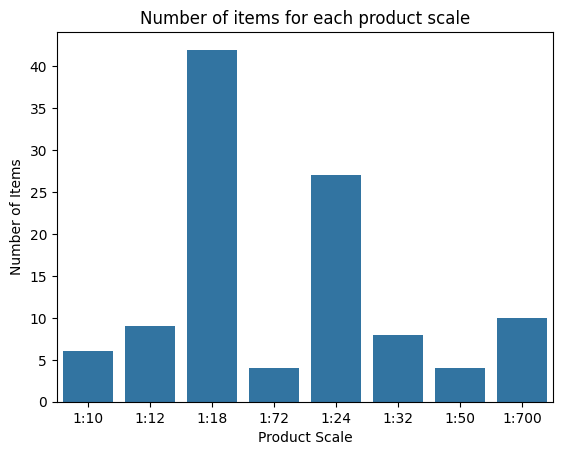

In [27]:
sns.barplot(x='Product Scale',y='Number of Items', data=data1)
plt.title('Number of items for each product scale')
plt.show()

2. Prepare a line plot with appropriate labels for total payments for each month in 2004.

In [50]:
v2 = """
SELECT MONTHNAME(paymentDate) AS 'Month', SUM(amount) AS `Total Payment` 
FROM payments
WHERE YEAR(paymentDate) = 2004
GROUP BY MONTH(paymentDate)
ORDER BY MONTH(paymentDate)
"""
data2 = pd.read_sql(v2,mydb)

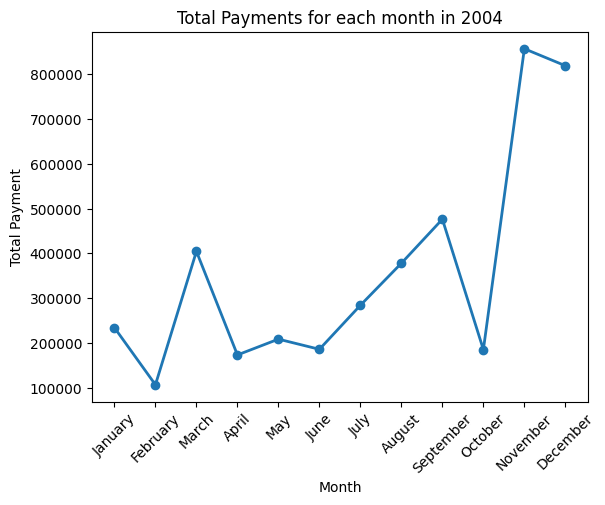

In [51]:
plt.plot('Month', 'Total Payment',data = data2, linewidth=2,marker = 'o')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Total Payment')
plt.title('Total Payments for each month in 2004')

# Show the plot
plt.show()

3. Create a histogram with appropriate labels for the value of orders received from the Nordic countries (Denmark,Finland, Norway,Sweden).

In [57]:
v3 = """
SELECT C.customerNumber, (OD.quantityOrdered * OD.priceEach) AS 'Value', C.country
FROM orderdetails OD
JOIN orders O ON O.orderNumber = OD.orderNumber
JOIN customers C ON C.customerNumber = O.customerNumber
WHERE C.country IN ('Denmark','Finland', 'Norway','Sweden')
"""
data3 = pd.read_sql(v3,mydb)

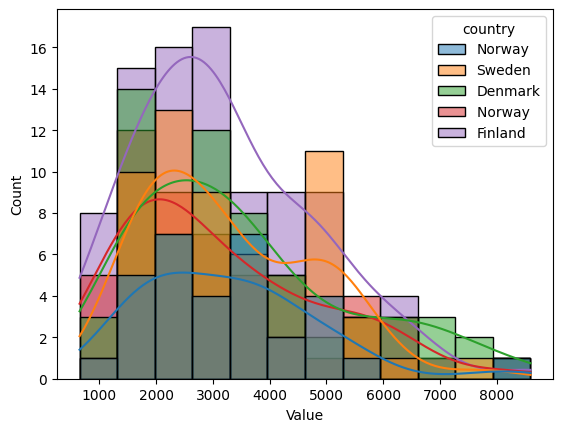

In [60]:
sns.histplot(data= data3, x='Value', kde=True,hue = 'country')
plt.show()

4. Create a heatmap for product lines and Norwegian cities.

In [70]:
v4 = """
SELECT count(*) as frequency, productLine, city
FROM Products, OrderDetails, Orders, Customers
                WHERE Products.productCode = OrderDetails.productCode
                AND OrderDetails.orderNumber = Orders.orderNumber
                AND Orders.customerNumber = Customers.customerNumber
                AND country = 'Norway'
                GROUP BY productLine, city
"""
data4 = pd.read_sql(v4,mydb)
data4 = data4.pivot(index='productLine', columns='city', values='frequency').fillna(0)

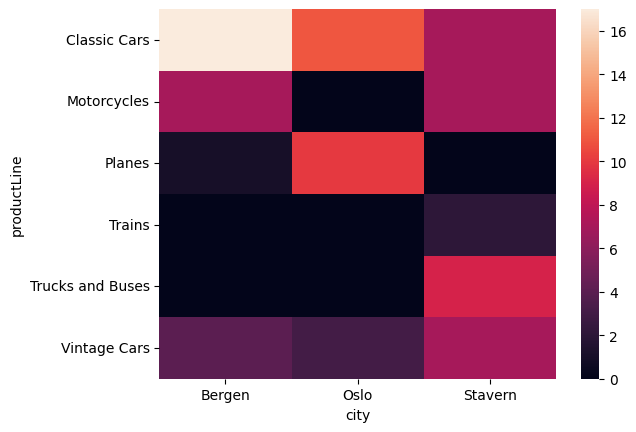

In [72]:
sns.heatmap(data4)
plt.show()

In [120]:
## mydb.close()